In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df=pd.read_csv(r"E:\Employee_Turnover_Prediction\dataset\employee_data.csv")

In [4]:
df.columns

Index(['department', 'promoted', 'review', 'projects', 'salary', 'tenure',
       'satisfaction', 'bonus', 'avg_hrs_month', 'left'],
      dtype='object')

In [5]:
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [6]:
df.tail()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes
9539,finance,0,0.626373,3,low,7.0,0.706455,1,185.920934,yes


In [7]:
df.shape

(9540, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [9]:
df.isna().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

In [10]:
df.nunique()

department         10
promoted            2
review           9540
projects            4
salary              3
tenure             11
satisfaction     9540
bonus               2
avg_hrs_month    9540
left                2
dtype: int64

In [11]:
for i in df.select_dtypes("object"):
    print(df[i].value_counts())
    print("*"*30)

department
sales          1883
retail         1541
operations     1522
engineering    1516
marketing       802
support         735
admin           423
finance         402
logistics       360
IT              356
Name: count, dtype: int64
******************************
salary
medium    6611
high      1548
low       1381
Name: count, dtype: int64
******************************
left
no     6756
yes    2784
Name: count, dtype: int64
******************************


In [12]:
df.sort_values("avg_hrs_month",ascending=False).head(30)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
5723,marketing,0,0.513217,3,low,12.0,0.741743,1,200.861656,no
7946,sales,0,0.615866,4,high,11.0,0.674152,1,199.377273,no
6456,operations,0,0.714813,4,low,11.0,0.533855,0,199.297775,no
5534,finance,0,0.654463,4,medium,11.0,0.762783,0,198.582251,no
7780,sales,0,0.583560,3,low,11.0,0.647896,0,198.166819,no
5867,support,1,0.710793,4,medium,11.0,0.654442,0,198.164130,no
7357,operations,0,0.780348,4,low,11.0,0.747597,0,197.915148,no
7857,operations,0,0.669697,4,low,11.0,0.653467,0,197.767340,no
8135,operations,0,0.665514,3,medium,11.0,0.598792,1,197.698552,no
8155,sales,0,0.640726,4,medium,11.0,0.580410,1,197.559283,no


In [13]:
df.groupby("salary").describe()[["projects","tenure","bonus"]].T

salary                 high          low       medium
projects count  1548.000000  1381.000000  6611.000000
         mean      3.260336     3.304852     3.271971
         std       0.557075     0.576507     0.584598
         min       2.000000     2.000000     2.000000
         25%       3.000000     3.000000     3.000000
         50%       3.000000     3.000000     3.000000
         75%       4.000000     4.000000     4.000000
         max       5.000000     5.000000     5.000000
tenure   count  1548.000000  1381.000000  6611.000000
         mean      6.580749     6.556119     6.550446
         std       1.442925     1.434790     1.404980
         min       3.000000     3.000000     2.000000
         25%       5.000000     5.000000     5.000000
         50%       7.000000     7.000000     7.000000
         75%       8.000000     8.000000     8.000000
         max      11.000000    12.000000    11.000000
bonus    count  1548.000000  1381.000000  6611.000000
         mean      0.213824     0.225199     0.208894
         std       0.410137     0.417865     0.406549
         min       0.000000     0.000000     0.000000
         25%       0.000000     0.000000     0.000000
         50%       0.000000     0.000000     0.000000
         75%       0.000000     0.000000     0.000000
         max       1.000000     1.000000     1.000000

In [14]:
df.groupby("department").describe()[["projects","tenure","bonus","satisfaction"]].T

department                  IT       admin  engineering     finance  \
projects     count  356.000000  423.000000  1516.000000  402.000000   
             mean     3.289326    3.278960     3.263852    3.293532   
             std      0.598589    0.557335     0.586121    0.622446   
             min      2.000000    2.000000     2.000000    2.000000   
             25%      3.000000    3.000000     3.000000    3.000000   
             50%      3.000000    3.000000     3.000000    3.000000   
             75%      4.000000    4.000000     4.000000    4.000000   
             max      5.000000    5.000000     5.000000    5.000000   
tenure       count  356.000000  423.000000  1516.000000  402.000000   
             mean     6.609551    6.498818     6.558047    6.440299   
             std      1.420898    1.419022     1.412320    1.363093   
             min      2.000000    2.000000     3.000000    3.000000   
             25%      6.000000    5.000000     5.000000    5.000000   
             50%      7.000000    6.000000     7.000000    6.000000   
             75%      8.000000    8.000000     8.000000    7.000000   
             max     11.000000   10.000000    11.000000   11.000000   
bonus        count  356.000000  423.000000  1516.000000  402.000000   
             mean     0.221910    0.186761     0.211082    0.231343   
             std      0.416116    0.390181     0.408211    0.422217   
             min      0.000000    0.000000     0.000000    0.000000   
             25%      0.000000    0.000000     0.000000    0.000000   
             50%      0.000000    0.000000     0.000000    0.000000   
             75%      0.000000    0.000000     0.000000    0.000000   
             max      1.000000    1.000000     1.000000    1.000000   
satisfaction count  356.000000  423.000000  1516.000000  402.000000   
             mean     0.515818    0.519444     0.504944    0.497183   
             std      0.159384    0.160904     0.158864    0.159629   
             min      0.164511    0.082504     0.063567    0.092752   
             25%      0.391811    0.414269     0.384802    0.381984   
             50%      0.500748    0.524451     0.497888    0.489862   
             75%      0.649673    0.640818     0.618698    0.622393   
             max      0.918924    1.000000     0.982158    0.913206   

department           logistics   marketing   operations       retail  \
projects     count  360.000000  802.000000  1522.000000  1541.000000   
             mean     3.275000    3.280549     3.271353     3.266061   
             std      0.601241    0.573963     0.572738     0.564602   
             min      2.000000    2.000000     2.000000     2.000000   
             25%      3.000000    3.000000     3.000000     3.000000   
             50%      3.000000    3.000000     3.000000     3.000000   
             75%      4.000000    4.000000     4.000000     4.000000   
             max      5.000000    5.000000     5.000000     5.000000   
tenure       count  360.000000  802.000000  1522.000000  1541.000000   
             mean     6.527778    6.503741     6.608410     6.591175   
             std      1.425711    1.438063     1.428233     1.392568   
             min      2.000000    3.000000     3.000000     3.000000   
             25%      5.000000    5.000000     6.000000     6.000000   
             50%      6.500000    6.000000     7.000000     7.000000   
             75%      8.000000    8.000000     8.000000     8.000000   
             max     10.000000   12.000000    11.000000    11.000000   
bonus        count  360.000000  802.000000  1522.000000  1541.000000   
             mean     0.208333    0.219451     0.206965     0.218689   
             std      0.406682    0.414133     0.405263     0.413491   
             min      0.000000    0.000000     0.000000     0.000000   
             25%      0.000000    0.000000     0.000000     0.000000   
             50%      0.000000    0.000000     0.000000     0.000000   


In [15]:
df.groupby("left").describe()[["projects","tenure","bonus","satisfaction"]].T

left                         no          yes
projects     count  6756.000000  2784.000000
             mean      3.279455     3.263649
             std       0.579490     0.578225
             min       2.000000     2.000000
             25%       3.000000     3.000000
             50%       3.000000     3.000000
             75%       4.000000     4.000000
             max       5.000000     5.000000
tenure       count  6756.000000  2784.000000
             mean      6.546625     6.579382
             std       1.456414     1.310624
             min       2.000000     2.000000
             25%       5.000000     6.000000
             50%       6.000000     7.000000
             75%       8.000000     8.000000
             max      12.000000     9.000000
bonus        count  6756.000000  2784.000000
             mean      0.215068     0.204741
             std       0.410900     0.403585
             min       0.000000     0.000000
             25%       0.000000     0.000000
             50%       0.000000     0.000000
             75%       0.000000     0.000000
             max       1.000000     1.000000
satisfaction count  6756.000000  2784.000000
             mean      0.505634     0.502244
             std       0.159931     0.155167
             min       0.000000     0.086249
             25%       0.389036     0.382483
             50%       0.504073     0.491455
             75%       0.624945     0.615496
             max       1.000000     0.980994

In [16]:
df[(df.projects==5) & (df.left=="yes")]

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
3524,sales,0,0.785969,5,medium,5.0,0.454978,0,180.736221,yes
3588,support,0,0.651736,5,high,6.0,0.460405,0,184.060617,yes
3617,operations,0,0.624843,5,medium,9.0,0.373691,0,191.340739,yes
3665,logistics,0,0.788979,5,medium,6.0,0.443882,0,184.376830,yes
3851,engineering,0,0.779416,5,medium,5.0,0.430375,0,180.554078,yes
3883,retail,0,0.854736,5,medium,5.0,0.344743,0,180.097851,yes
3968,support,0,0.786576,5,medium,5.0,0.340663,0,179.107798,yes
4080,engineering,0,0.842328,5,medium,5.0,0.348223,0,180.058674,yes
4289,logistics,0,0.704434,5,medium,6.0,0.382317,0,182.993667,yes
4302,operations,0,0.705975,5,medium,6.0,0.303816,0,183.505640,yes


In [17]:
len(df[df.projects==5])

71

In [18]:
df[(df.salary=="high") & (df.left=="yes")]

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
3351,retail,0,0.570142,4,high,6.0,0.704609,0,181.835015,yes
3389,retail,0,0.833557,3,high,5.0,0.508392,0,178.613723,yes
3394,marketing,0,0.641999,3,high,7.0,0.458783,0,185.432031,yes
3398,logistics,0,0.752045,2,high,5.0,0.556001,1,181.230924,yes
3403,finance,0,0.631174,3,high,7.0,0.540458,0,185.326557,yes
...,...,...,...,...,...,...,...,...,...,...
9523,sales,0,0.631295,3,high,8.0,0.577073,0,188.603161,yes
9525,engineering,0,0.756849,3,high,8.0,0.732554,0,187.792071,yes
9527,sales,0,0.735405,4,high,8.0,0.572918,1,188.973366,yes
9528,marketing,0,0.741918,3,high,8.0,0.387040,0,189.205231,yes


In [19]:
len(df[df.salary=="high"])

1548

In [20]:
len(df[(df.salary=="high") & (df.left=="yes")])/len(df[df.salary=="high"])

0.28552971576227393

In [21]:
df[(df.salary=="low") & (df.left=="yes")]

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
1078,sales,0,0.600301,3,low,6.0,0.657108,0,182.426505,yes
1839,retail,0,0.559148,3,low,6.0,0.559136,0,183.438258,yes
2952,sales,0,0.753666,4,low,5.0,0.539612,0,180.903977,yes
3186,marketing,0,0.585958,3,low,6.0,0.617453,0,181.752999,yes
3396,operations,0,0.674539,2,low,7.0,0.441500,0,185.936968,yes
...,...,...,...,...,...,...,...,...,...,...
9510,sales,0,0.680446,4,low,8.0,0.651176,1,187.517418,yes
9514,admin,0,0.664915,3,low,8.0,0.445933,0,189.244414,yes
9530,engineering,0,0.651929,4,low,7.0,0.745873,0,187.114221,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes


In [22]:
len(df[df.salary=="low"])

1381

In [23]:
len(df[(df.salary=="low") & (df.left=="yes")])/len(df[df.salary=="low"])

0.2831281679942071

In [24]:
df[(df.salary=="low") & (df.left=="no")]

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
8,sales,0,0.652818,4,low,6.0,0.678696,0,183.655790,no
12,marketing,0,0.611419,3,low,6.0,0.502041,0,183.666686,no
16,IT,0,0.679621,4,low,6.0,0.480245,0,183.423787,no
17,admin,0,0.471118,4,low,5.0,0.887439,0,180.443724,no
...,...,...,...,...,...,...,...,...,...,...
8147,logistics,0,0.673586,4,low,7.0,0.285597,1,186.937039,no
8149,support,0,0.678025,3,low,9.0,0.484836,0,190.776048,no
8154,retail,0,0.638950,4,low,7.0,0.298651,0,184.722219,no
8675,finance,0,0.556106,3,low,7.0,0.660243,0,186.714146,no


In [25]:
len(df[(df.left=="no")])

6756

In [26]:
len(df[(df.salary=="low") & (df.left=="no")])/len(df[(df.left=="no")])

0.14653641207815277

In [27]:
num_list=[i for i in df.select_dtypes(include=["int64","float64"])]
cat_list=[i for i in df.select_dtypes("object")]

In [28]:
num_list

['promoted',
 'review',
 'projects',
 'tenure',
 'satisfaction',
 'bonus',
 'avg_hrs_month']

In [29]:
cat_list

['department', 'salary', 'left']

C:\Users\DELL\AppData\Local\Temp\ipykernel_18096\468784544.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\DELL\AppData\Local\Temp\ipykernel_18096\468784544.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\DELL\AppData\Local\Temp\ipykernel_18096\468784544.p

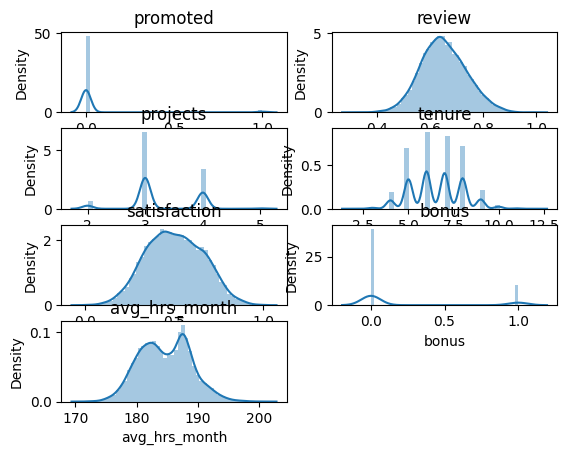

In [30]:
k=1
for i in df.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1

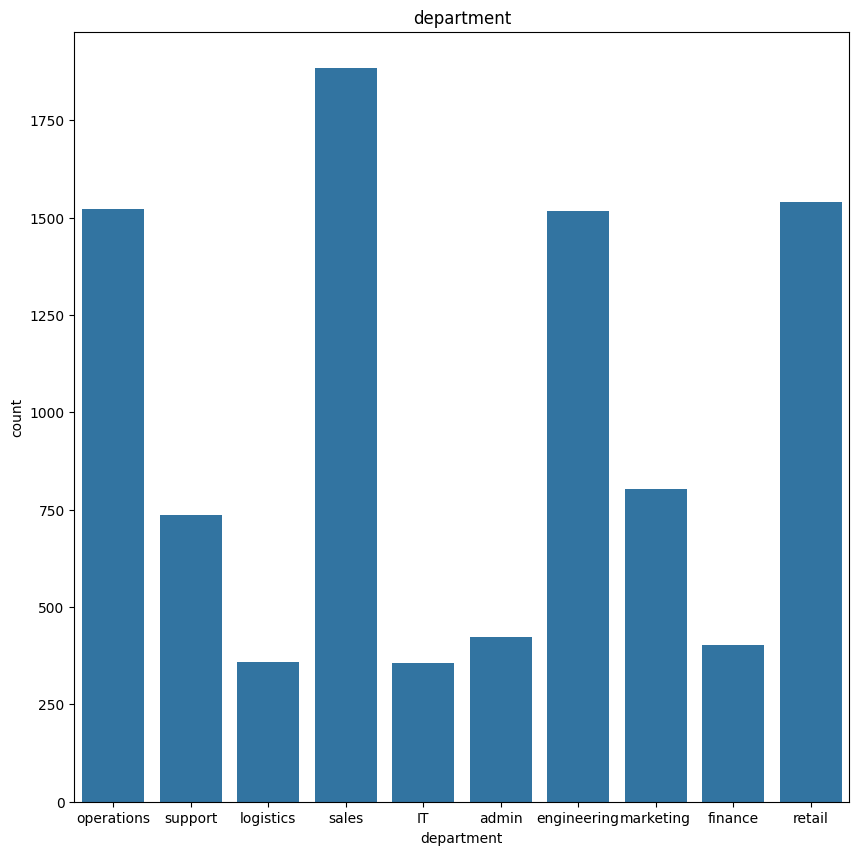

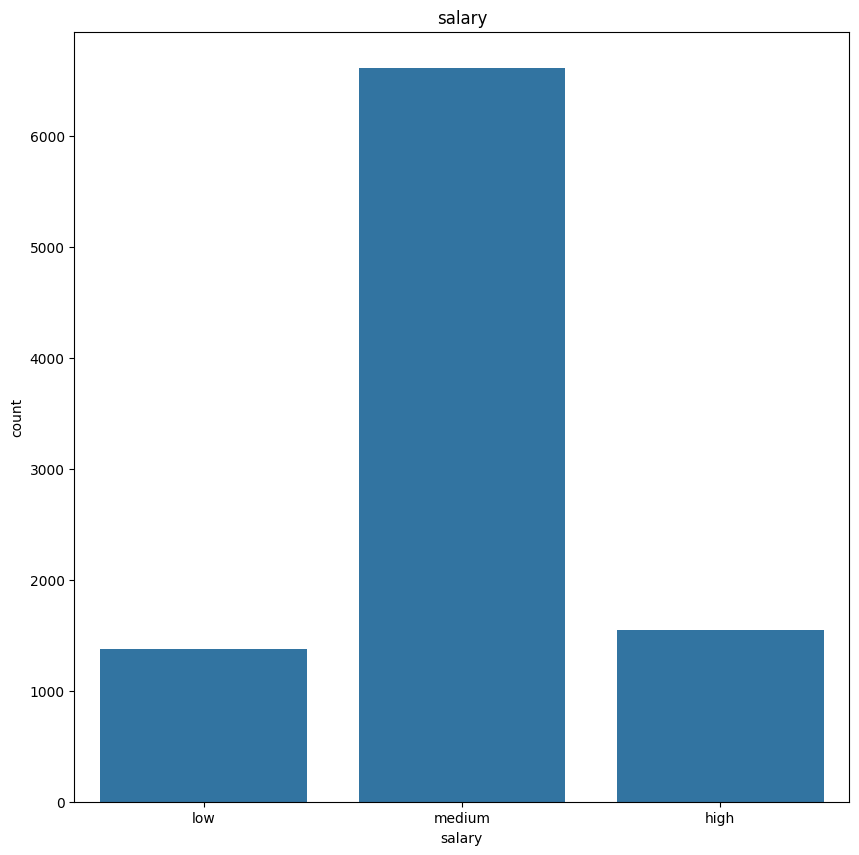

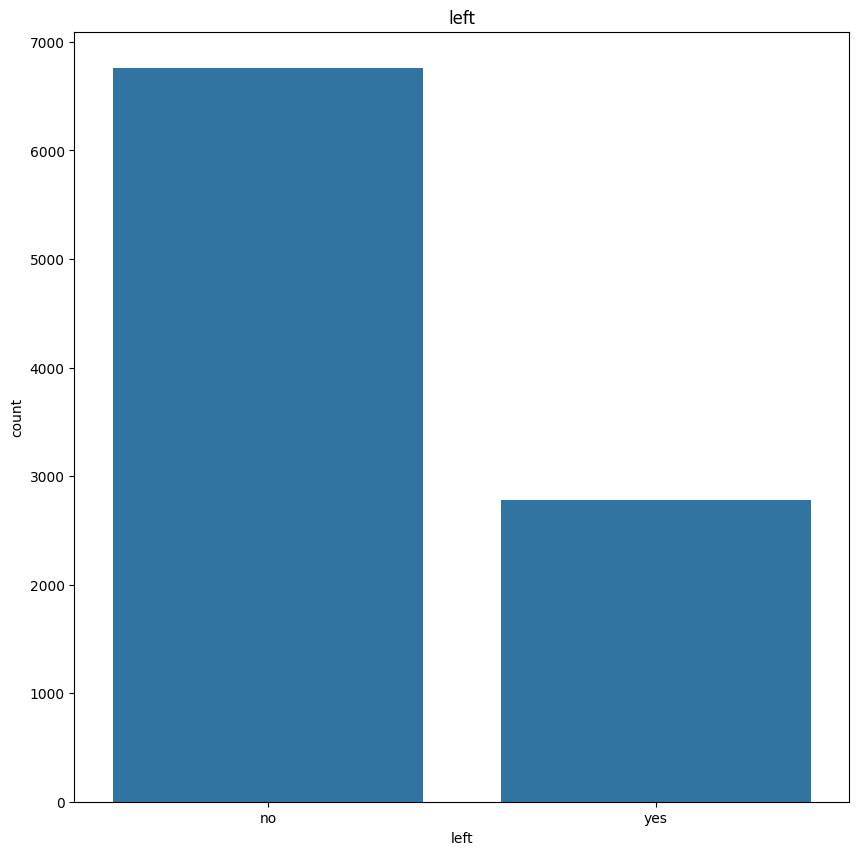

In [31]:
for i in cat_list:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i,data=df.loc[:,cat_list])
    plt.title(i)

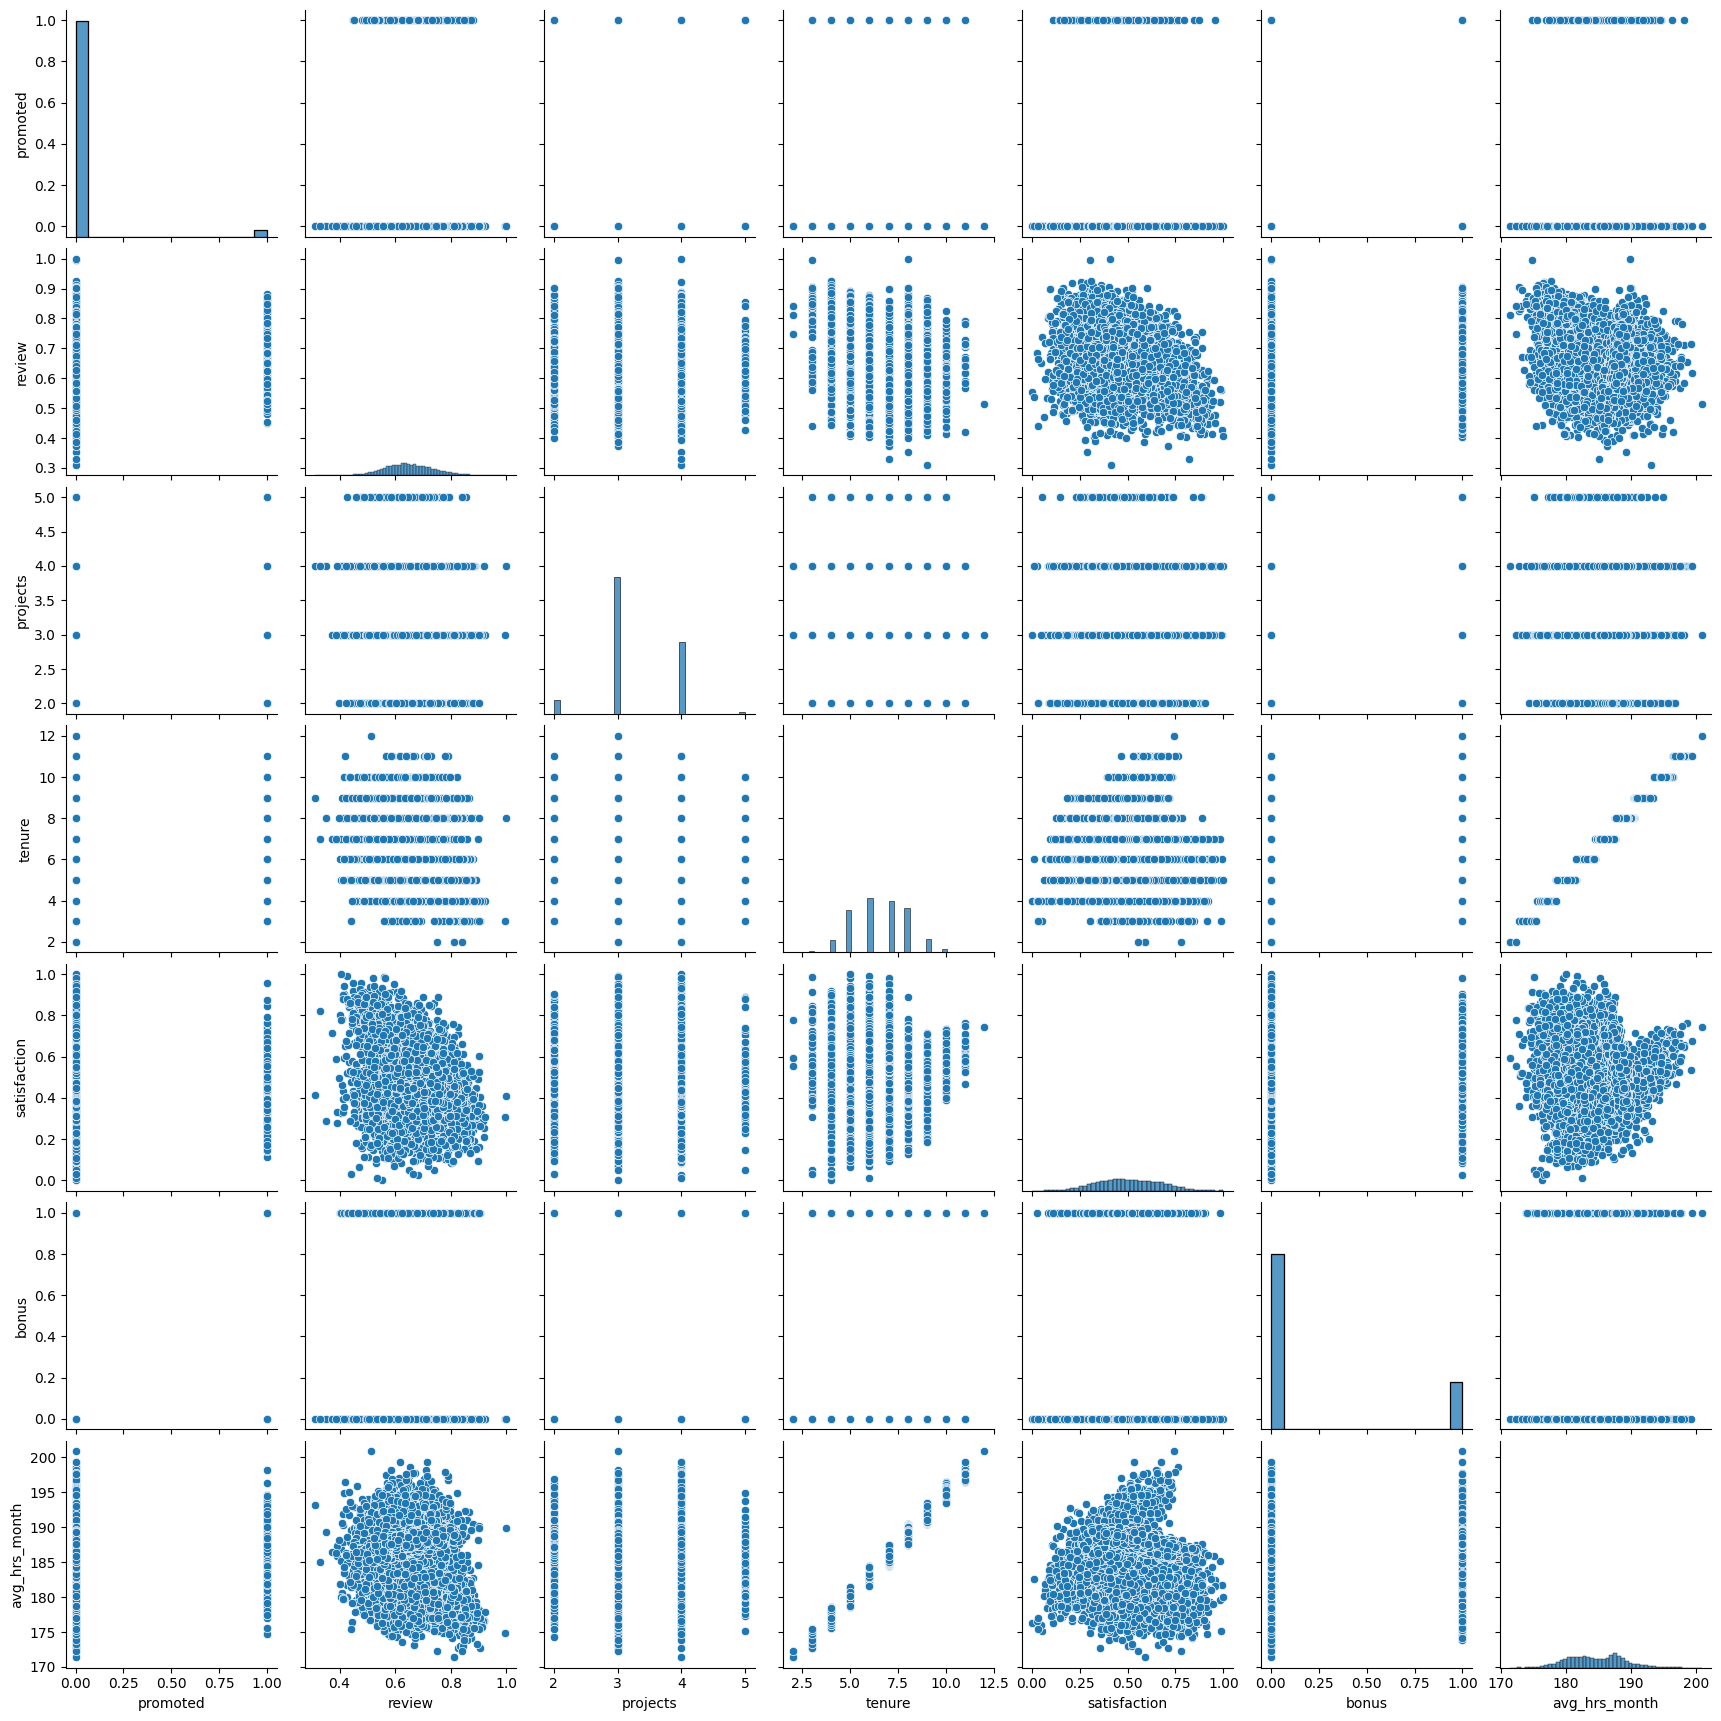

In [32]:
sns.pairplot(df.loc[:,num_list])

array([[<Axes: title={'center': 'promoted'}>,
        <Axes: title={'center': 'review'}>,
        <Axes: title={'center': 'projects'}>],
       [<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'satisfaction'}>,
        <Axes: title={'center': 'bonus'}>],
       [<Axes: title={'center': 'avg_hrs_month'}>, <Axes: >, <Axes: >]],
      dtype=object)

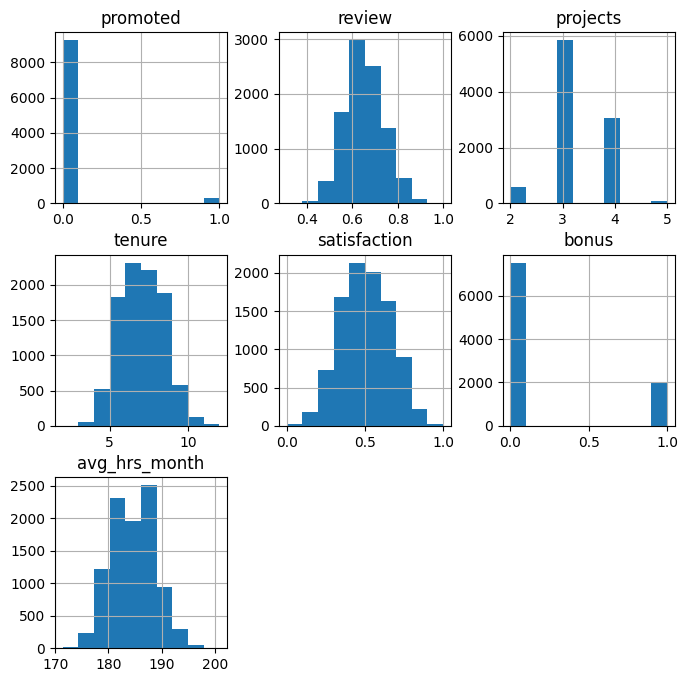

In [33]:
df.hist(figsize=(8,8))

In [34]:
df.select_dtypes(include="object").head()

,department,salary,left
0,operations,low,no
1,operations,medium,no
2,support,medium,no
3,logistics,high,no
4,sales,high,no


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [37]:
df.salary=le.fit_transform(df.salary)

In [38]:
dms=pd.get_dummies(df[["department","left"]])

In [39]:
dms

,department_IT,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,left_no,left_yes
0,False,False,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,True,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9535,False,False,False,False,False,False,True,False,False,False,False,True
9536,False,False,False,False,True,False,False,False,False,False,False,True
9537,False,False,False,False,False,False,True,False,False,False,False,True
9538,True,False,False,False,False,False,False,False,False,False,False,True


In [40]:
df.drop(["department","left"],axis=1,inplace=True)

In [41]:
df=pd.concat([df,dms],axis=1)
df

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,department_IT,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,left_no,left_yes
0,0,0.577569,3,1,5.0,0.626759,0,180.866070,False,False,False,False,False,False,True,False,False,False,True,False
1,0,0.751900,3,2,6.0,0.443679,0,182.708149,False,False,False,False,False,False,True,False,False,False,True,False
2,0,0.722548,3,2,6.0,0.446823,0,184.416084,False,False,False,False,False,False,False,False,False,True,True,False
3,0,0.675158,4,0,8.0,0.440139,0,188.707545,False,False,False,False,True,False,False,False,False,False,True,False
4,0,0.676203,3,0,5.0,0.577607,1,179.821083,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,0,0.610988,4,2,8.0,0.543641,0,188.155738,False,False,False,False,False,False,True,False,False,False,False,True
9536,0,0.746887,3,2,8.0,0.549048,0,188.176164,False,False,False,False,True,False,False,False,False,False,False,True
9537,0,0.557980,3,1,7.0,0.705425,0,186.531008,False,False,False,False,False,False,True,False,False,False,False,True
9538,0,0.584446,4,2,8.0,0.607287,1,187.641370,True,False,False,False,False,False,False,False,False,False,False,True


<Axes: >

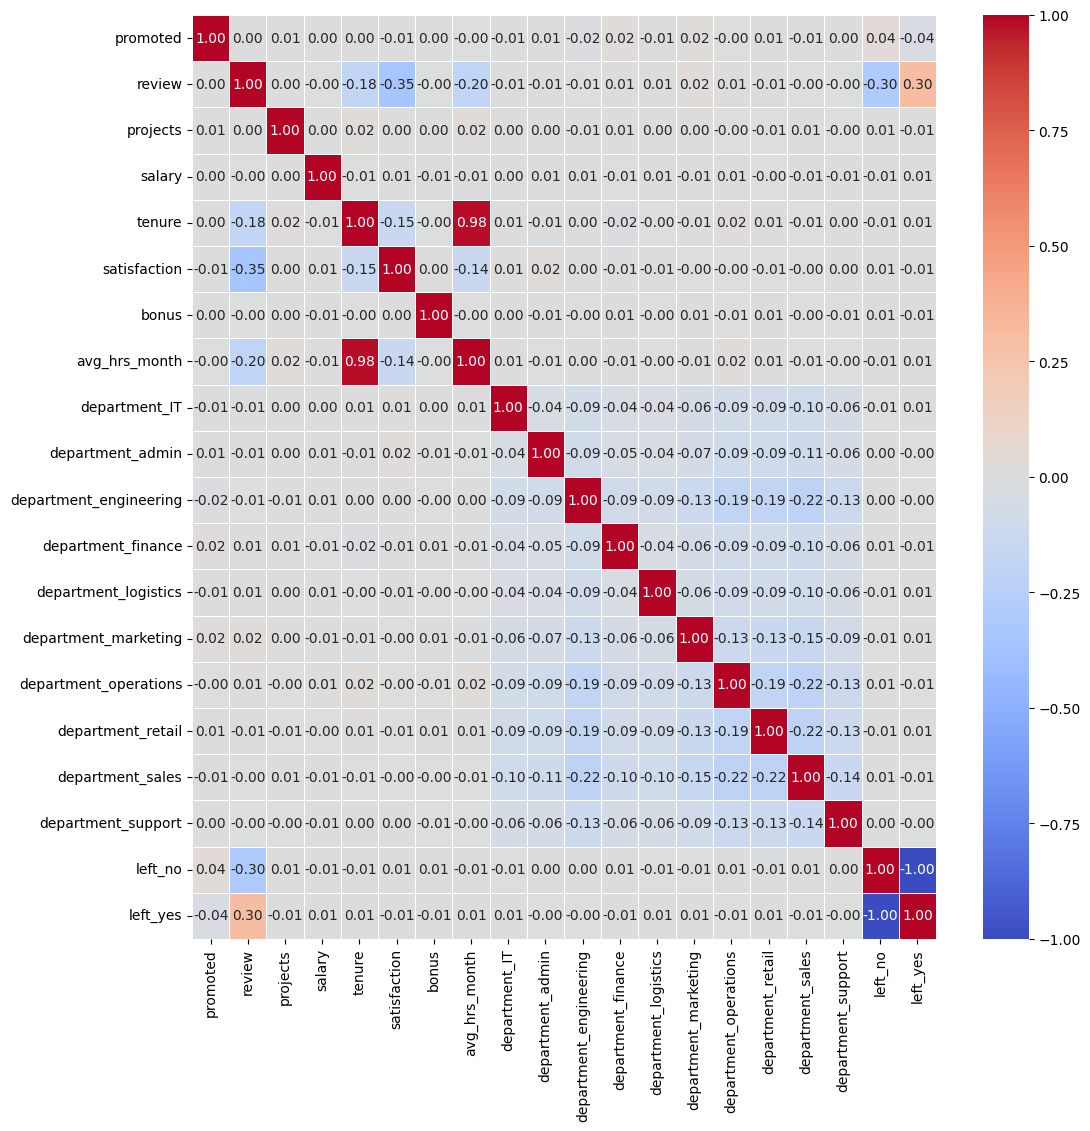

In [42]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.6,fmt=".2f",cmap="coolwarm")

In [43]:
df.drop("left_no",axis=1,inplace=True)
df.head()

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,department_IT,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,left_yes
0,0,0.577569,3,1,5.0,0.626759,0,180.866070,False,False,False,False,False,False,True,False,False,False,False
1,0,0.751900,3,2,6.0,0.443679,0,182.708149,False,False,False,False,False,False,True,False,False,False,False
2,0,0.722548,3,2,6.0,0.446823,0,184.416084,False,False,False,False,False,False,False,False,False,True,False
3,0,0.675158,4,0,8.0,0.440139,0,188.707545,False,False,False,False,True,False,False,False,False,False,False
4,0,0.676203,3,0,5.0,0.577607,1,179.821083,False,False,False,False,False,False,False,False,True,False,False


In [44]:
df.drop("avg_hrs_month",axis=1,inplace=True)
df.head()

,promoted,review,projects,salary,tenure,satisfaction,bonus,department_IT,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,left_yes
0,0,0.577569,3,1,5.0,0.626759,0,False,False,False,False,False,False,True,False,False,False,False
1,0,0.751900,3,2,6.0,0.443679,0,False,False,False,False,False,False,True,False,False,False,False
2,0,0.722548,3,2,6.0,0.446823,0,False,False,False,False,False,False,False,False,False,True,False
3,0,0.675158,4,0,8.0,0.440139,0,False,False,False,False,True,False,False,False,False,False,False
4,0,0.676203,3,0,5.0,0.577607,1,False,False,False,False,False,False,False,False,True,False,False


In [45]:
df.columns

Index(['promoted', 'review', 'projects', 'salary', 'tenure', 'satisfaction',
       'bonus', 'department_IT', 'department_admin', 'department_engineering',
       'department_finance', 'department_logistics', 'department_marketing',
       'department_operations', 'department_retail', 'department_sales',
       'department_support', 'left_yes'],
      dtype='object')

In [46]:
cor=df.corr()["left_yes"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with left_yes":cor.values})

,column,Correlation with left_yes
0,left_yes,1.000000
1,review,0.304294
2,department_retail,0.013345
3,tenure,0.010521
4,salary,0.009589
5,department_marketing,0.007443
6,department_IT,0.007434
7,department_logistics,0.007192
8,department_support,-0.002154
9,department_engineering,-0.003409


# Modelling

In [47]:
X=df.drop("left_yes",axis=1)
y=df["left_yes"]

In [48]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale,StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [50]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [52]:
# models 

log=LogisticRegression().fit(X_train,y_train)
naiv=BernoulliNB().fit(X_train,y_train)
knn=KNeighborsClassifier().fit(X_train,y_train)
svm=SVC().fit(X_train,y_train)
mlpc=MLPClassifier().fit(X_train,y_train)
dtc=DecisionTreeClassifier().fit(X_train,y_train)
rf=RandomForestClassifier().fit(X_train,y_train)
xgb=XGBClassifier().fit(X_train,y_train)
gbm=GradientBoostingClassifier().fit(X_train,y_train)
lgb=LGBMClassifier().fit(X_train,y_train)
catbost=CatBoostClassifier().fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 2208, number of negative: 5424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 553
[LightGBM] [Info] Number of data points in the train set: 7632, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289308 -> initscore=-0.898746
[LightGBM] [Info] Start training from score -0.898746
Learning rate set to 0.024537
0:	learn: 0.6721725	total: 167ms	remaining: 2m 46s
1:	learn: 0.6549011	total: 189ms	remaining: 1m 34s
2:	learn: 0.6357425	total: 207ms	remaining: 1m 8s
3:	learn: 0.6198983	total: 225ms	remaining: 56.1s
4:	learn: 0.6036761	total: 237ms	remaining: 47.1s
5:	learn: 0.5876536	total: 247ms	remaining: 40.9s
6:	learn: 0.5733084	total: 259ms	remaining: 36.8s
7:	learn: 0.5609589	total: 271ms	remaining: 33.6s
8:	learn: 0.54

In [53]:
models=[log,naiv,knn,svm,mlpc,dtc,rf,xgb,gbm,lgb,catbost]

In [54]:
def ML(y,models):
    y_pred=models.predict(X_test)
    accuary=accuracy_score(y_test,y_pred)
    return accuary

In [55]:
from sklearn.metrics import precision_score

In [56]:
def ML(y,models):
    y_pred=models.predict(X_test)
    accuary=precision_score(y_test,y_pred)
    return accuary

In [57]:
for i in models:
     print(i,"Algorithm succed rate :",ML("left_yes",i))

LogisticRegression() Algorithm succed rate : 0.6538461538461539
BernoulliNB() Algorithm succed rate : 0.0
KNeighborsClassifier() Algorithm succed rate : 0.6574074074074074
SVC() Algorithm succed rate : 0.0
MLPClassifier() Algorithm succed rate : 0.7905759162303665
DecisionTreeClassifier() Algorithm succed rate : 0.6206896551724138
RandomForestClassifier() Algorithm succed rate : 0.7546777546777547
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=na

In [58]:
from sklearn.metrics import recall_score

In [59]:
def ML(y,models):
    y_pred=models.predict(X_test)
    accuary=recall_score(y_test,y_pred)
    return accuary

In [60]:
for i in models:
     print(i,"Algorithm succed rate :",ML("left_yes",i))

LogisticRegression() Algorithm succed rate : 0.17708333333333334
BernoulliNB() Algorithm succed rate : 0.0
KNeighborsClassifier() Algorithm succed rate : 0.4930555555555556
SVC() Algorithm succed rate : 0.0
MLPClassifier() Algorithm succed rate : 0.5243055555555556
DecisionTreeClassifier() Algorithm succed rate : 0.625
RandomForestClassifier() Algorithm succed rate : 0.6302083333333334
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_

#  Model Tuning

# Randomforest

In [61]:
rf_gs_params={
    "n_estimators":[100,150,200],
    "max_depth":[2,3,4,5],
    "min_samples_split":[2,3,4],
    "min_samples_leaf":[1,2,3]
    
    
}

In [62]:
rf_gs_cv=GridSearchCV(rf,rf_gs_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [63]:
rf_gs_cv.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [64]:
rf_tun1=RandomForestClassifier(max_depth=5,min_samples_split=3,min_samples_leaf=1,
                              n_estimators=150).fit(X_train,y_train)


In [65]:
pip install optuna


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
import optuna
from optuna import Trial,visualization,trial
from optuna.samplers import TPESampler

In [67]:
def return_score(param):
    model=RandomForestClassifier(**param).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc1=accuracy_score(y_test,y_pred)
    acc2=precision_score(y_test,y_pred)
    acc3=recall_score(y_test,y_pred)
   

    return acc1,acc2,acc3

In [68]:
def objective(trial):
    param={
        "n_estimators":trial.suggest_int("n_estimators",50,400),
        "min_samples_split":trial.suggest_int("min_samples_split ",2,8),
        "max_depth":trial.suggest_int("max_depth",2,15),
        "min_samples_leaf":trial.suggest_int("min_samples_leaf",1,10),
        "criterion":trial.suggest_categorical("criterion",['gini','entropy'])

                

    }
    return(return_score(param))

In [69]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=300)

[I 2024-08-12 11:34:38,572] A new study created in memory with name: no-name-9fd80999-ca5e-4b0d-ac5d-901778307680


[W 2024-08-12 11:34:42,195] Trial 0 failed with parameters: {'n_estimators': 335, 'min_samples_split ': 7, 'max_depth': 11, 'min_samples_leaf': 6, 'criterion': 'entropy'} because of the following error: The number of the values 3 did not match the number of the objectives 1.
[W 2024-08-12 11:34:42,195] Trial 0 failed with value (0.8259958071278826, 0.7747747747747747, 0.5972222222222222).
[W 2024-08-12 11:34:43,796] Trial 1 failed with parameters: {'n_estimators': 154, 'min_samples_split ': 7, 'max_depth': 14, 'min_samples_leaf': 10, 'criterion': 'entropy'} because of the following error: The number of the values 3 did not match the number of the objectives 1.
[W 2024-08-12 11:34:43,796] Trial 1 failed with value (0.8280922431865828, 0.7805429864253394, 0.5989583333333334).
[W 2024-08-12 11:34:45,252] Trial 2 failed with parameters: {'n_estimators': 224, 'min_samples_split ': 5, 'max_depth': 7, 'min_samples_leaf': 1, 'criterion': 'gini'} because of the following error: The number of th

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

       False       0.85      0.91      0.88      1332
        True       0.75      0.63      0.69       576

    accuracy                           0.83      1908
   macro avg       0.80      0.77      0.78      1908
weighted avg       0.82      0.83      0.82      1908



Text(0.5, 1.0, 'Random Forest')

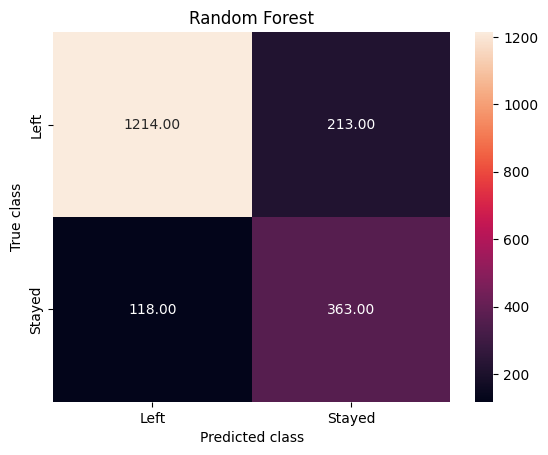

In [71]:
from sklearn import metrics
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')



# Save Model

In [72]:
import pickle
pickle.dump(log , open('Employee_Turnover_prognosis_Logistic.pkl', 'wb'))
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('Employee_Turnover_prognosis_RandomForest.pkl', 'rb'))
    event = str(list(pickled_model.predict(features)))
    
    return str(f'The event is {event}')
df.head()

,promoted,review,projects,salary,tenure,satisfaction,bonus,department_IT,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,left_yes
0,0,0.577569,3,1,5.0,0.626759,0,False,False,False,False,False,False,True,False,False,False,False
1,0,0.751900,3,2,6.0,0.443679,0,False,False,False,False,False,False,True,False,False,False,False
2,0,0.722548,3,2,6.0,0.446823,0,False,False,False,False,False,False,False,False,False,True,False
3,0,0.675158,4,0,8.0,0.440139,0,False,False,False,False,True,False,False,False,False,False,False
4,0,0.676203,3,0,5.0,0.577607,1,False,False,False,False,False,False,False,False,True,False,False
